### Questions related to historical IT & Data Science offers can be answered in this jupyter notebook:
- Question 1. During which time range in a year, do we have the most amount of job offers the market provided? 
- Question 2. What are the top companies offering the largest number of job opportunities? Have they changed over the past several years?

- Question 3. Who has got the largest number of opportunities and when?

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('offers_US.csv', encoding='utf-8')

In [3]:
df.shape

(8839, 8)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        8839 non-null   datetime64[ns]
 1   Poster      7002 non-null   object        
 2   Replies     8839 non-null   int64         
 3   Views       8839 non-null   int64         
 4   post_id     8839 non-null   int64         
 5   post_title  8839 non-null   object        
 6   company     8421 non-null   object        
 7   experience  8746 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 414.4+ KB


In [6]:
df.head()

,Date,Poster,Replies,Views,post_id,post_title,company,experience
0,2020-11-15,NaN,0,89,687976,Qualtrics莫名其妙跳楼包,Qualtrics,博士+(1-3年)
1,2020-11-15,kankanjiukankan,1,211,687929,条纹最新调整offer结构包,stripe,硕士+(5-10年)
2,2020-11-14,NaN,0,104,687845,McKinsey QB DE,McKinsey,硕士+(1-3年)
3,2020-11-14,NaN,1,178,687839,Roblox NG 标准包,Roblox,硕士+(fresh grad 无实习或全职)
4,2020-11-14,jackzhang1990,24,2245,687810,Facebook E5大包,Facebook,硕士+(5-10年)


### Remove the post containing "求内推(asking for help)"

In [7]:
df['is_referral'] = df['post_title'].apply(lambda x :0 if '求' in x else 1)

In [8]:
df.head(5)

,Date,Poster,Replies,Views,post_id,post_title,company,experience,is_referral
0,2020-11-15,NaN,0,89,687976,Qualtrics莫名其妙跳楼包,Qualtrics,博士+(1-3年),1
1,2020-11-15,kankanjiukankan,1,211,687929,条纹最新调整offer结构包,stripe,硕士+(5-10年),1
2,2020-11-14,NaN,0,104,687845,McKinsey QB DE,McKinsey,硕士+(1-3年),1
3,2020-11-14,NaN,1,178,687839,Roblox NG 标准包,Roblox,硕士+(fresh grad 无实习或全职),1
4,2020-11-14,jackzhang1990,24,2245,687810,Facebook E5大包,Facebook,硕士+(5-10年),1


In [9]:
# Remove the post requesting help.
df = df[df['is_referral']==1]; len(df)

8202

## Question 1. During which time range in a year, do we have the most amount of referrals provided? 


## Daily counts of posts posted.

Text(0.5, 1.0, 'daily number of posts for all years')

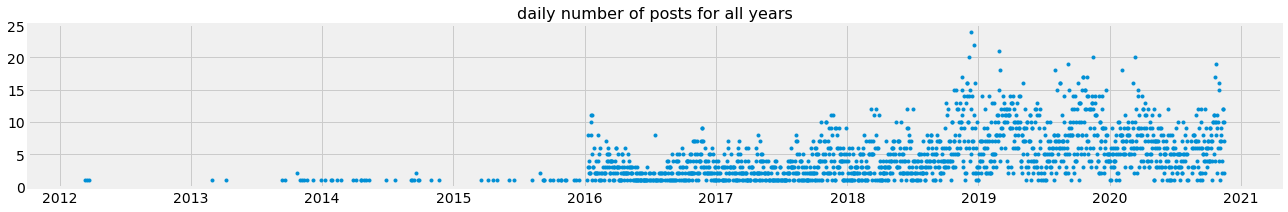

In [10]:
daily_count = df.groupby('Date').count()

plt.figure(figsize=(20,3))
plt.plot(daily_count['post_id'], marker='.', linestyle='')
# plt.xlim((pd.to_datetime('2014-07-01'), pd.to_datetime('2020-07-01')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('daily number of posts for all years',fontsize=16)

### Weekly counts

In [11]:
df = df.set_index('Date')

Text(0.5, 1.0, 'Weekly counts of posts')

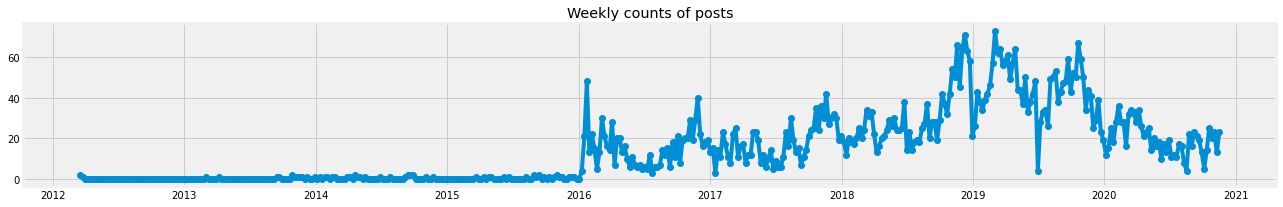

In [12]:
df_week_counts = df.resample('W').count() 

plt.figure(figsize=(20,3))
# plt.xlim((pd.to_datetime('2017-07-01'), pd.to_datetime('2020-08-29')))
plt.plot(df_week_counts.index, df_week_counts.Poster, marker='o', linestyle='-')
plt.title('Weekly counts of posts')

### Monthly counts

Text(0.5, 1.0, 'Monthly counts of posts')

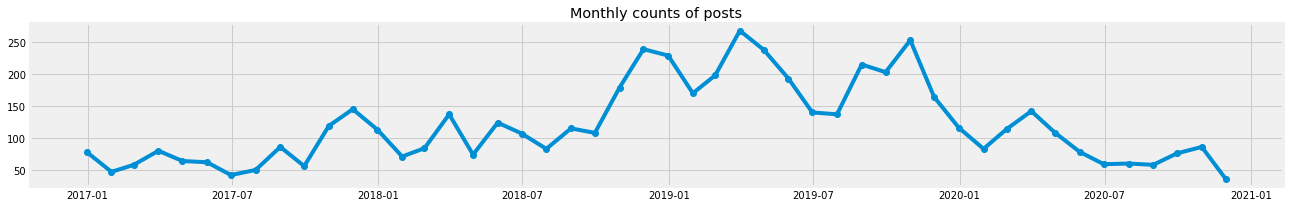

In [13]:
df_monthly_counts = df.resample('M').count() 

plt.figure(figsize=(20,3))
plt.plot(df_monthly_counts['2016-12-24':].index, df_monthly_counts['2016-12-24':].Poster, marker='o', linestyle='-')
plt.title('Monthly counts of posts')

##### We can see that the September is the peak month in the year for companies offering opportunities. Covid-19 pandemic serious pushed down the number of job offers posted. It may due to both decreasing job offers and salary amount. People tend to show offers with higher salary.

### Rolling average

Text(0.5, 1.0, 'Rolling averages of daily posts offering internal referrals')

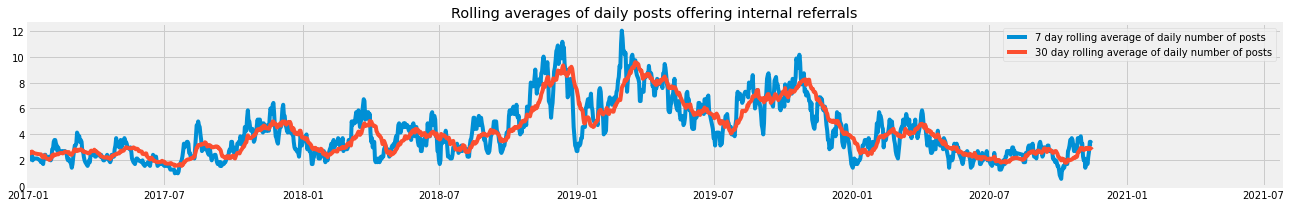

In [14]:
df_new = df.groupby('Date').count()

daily_post_avg_7 = df_new.rolling(7).mean()['Poster']
daily_post_avg_30 = df_new.rolling(28).mean()['Poster']

plt.figure(figsize=(20, 3))
plt.plot(daily_post_avg_7, label='7 day rolling average of daily number of posts')
plt.plot(daily_post_avg_30, label='30 day rolling average of daily number of posts')
plt.xlim((pd.to_datetime('2017-01-01'), pd.to_datetime('2021-07-24')))
plt.legend()
plt.title('Rolling averages of daily posts offering internal referrals')
# plt.xticks([0, 1, 2], ['January', 'February', 'March'])

## Question 2. What are the top companies offering the largest number of referral opportunities? Have they changed over the past several years?

In [15]:
posts_per_company = df['company'].value_counts()[:20]; posts_per_company.head()

Amazon       1256
Google        828
Microsoft     708
Facebook      646
Apple         258
Name: company, dtype: int64

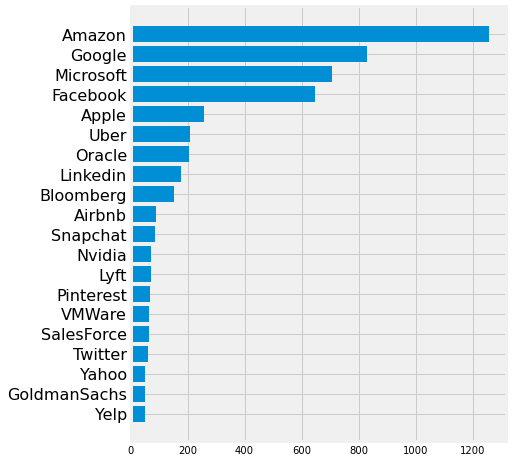

In [16]:
plt.figure(figsize=(6,8))
plt.barh(posts_per_company.index, posts_per_company.values)
plt.yticks(fontsize=16)
plt.gca().invert_yaxis()

##  Question 3. Who has created the largest amount of referrals?
### Top ten author ordered by number of posts and average views

In [17]:
poster_info = df.groupby(['Poster']).agg({'Views': ['count','sum', 'mean', 'min', 'max'], 'Replies': ['mean', 'min', 'max']})
poster_info.columns = ['_'.join(x) for x in poster_info.columns.ravel()]
poster_info.sort_values(by=['Views_count', 'Views_mean'], ascending=False).head(10)

,Views_count,Views_sum,Views_mean,Views_min,Views_max,Replies_mean,Replies_min,Replies_max
Poster,,,,,,,,
g56422,17,21841,1284.764706,471,2485,2.235294,0,6
zhjdenis,14,41153,2939.500000,797,7964,8.428571,0,30
diyutianshi,13,58871,4528.538462,1988,8022,8.153846,3,24
shiloh00,9,107635,11959.444444,3597,27370,38.888889,12,101
PENETRATIVE,9,36661,4073.444444,2358,5498,11.444444,7,20
hexuanus,9,18123,2013.666667,1251,2726,4.000000,1,10
wx6807,9,8859,984.333333,164,2916,7.555556,0,21
weapon3042,8,29905,3738.125000,2361,6472,12.625000,3,27
ted7726,8,25081,3135.125000,1514,8627,8.125000,2,31


In [18]:
df[df.Poster=='g56422']

,Poster,Replies,Views,post_id,post_title,company,experience,is_referral
Date,,,,,,,,
2019-01-02,g56422,4,1424,468718,Oracle 2017 new grad offer,Oracle,硕士+(短暂实习或全职不超过3个月),1
2019-01-02,g56422,0,841,468716,Lab126 2017 New grad offer,Lab126,硕士+(短暂实习或全职不超过3个月),1
2019-01-02,g56422,0,471,468714,Meraki 2017 New grad offer,Meraki,硕士+(短暂实习或全职不超过3个月),1
2019-01-02,g56422,1,668,468713,microsoft 2017 offer,Microsoft,硕士+(短暂实习或全职不超过3个月),1
2019-01-02,g56422,2,1524,468710,Nutanix 2017 new grad offer,Nutanix,硕士+(短暂实习或全职不超过3个月),1
2016-02-04,g56422,1,1496,169225,Bloomberg fulltime offer,Bloomberg,本科+(fresh grad 无实习或全职),1
2016-01-24,g56422,2,1131,166982,Altera Toronto Fulltime,Altera,本科+(fresh grad 无实习或全职),1
2016-01-13,g56422,5,1983,165481,RBC Toronto Offer,RBC,本科+(fresh grad 无实习或全职),1
2016-01-12,g56422,5,1789,165252,IBM Toronto Fulltime Offer,IBM,本科+(fresh grad 无实习或全职),1
